In [147]:
import io
import unicodedata
import re
import os
from nltk import word_tokenize
import random
from matplotlib.pyplot import figure
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import numpy as np
import glob


# Define loading function

In [2]:
def loaddata(filename):
    #file = io.open(filename,'r')
    
    print("Scannig...")
    f = open(filename, "r")
    return f.readlines()


# Load Italian dataset (long sentences)

In [149]:
filename_human = './italian/italian long/english_original_data.txt'
filename_trans= './italian/italian long/english_translated_data.txt'
filename_source = './italian/sourceITA.txt'

print('Italian stats -- long sentences')
print('')
print("Loading human corpus...")
human = loaddata(filename_human)
print("Done extracting lines! :)")
print('')

print("Loading human corpus...")
machine = loaddata(filename_trans)
print("Done extracting lines! :)")
print('')

print("Loading source corpus...")
sourc = loaddata(filename_source)
print("Done extracting lines! :)")
print('')


total_sentences_human = len(human)
total_sentences_machine = len(machine)
total_sentences_source = len(sourc)

print("Sentences made by human: " +str(total_sentences_human))
print("Sentences made by google: " +str(total_sentences_machine))
print("Sentences source: " +str(total_sentences_source))






Italian stats -- long sentences

Loading human corpus...
Scannig...
Done extracting lines! :)

Loading human corpus...
Scannig...
Done extracting lines! :)

Loading source corpus...
Scannig...
Done extracting lines! :)

Sentences made by human: 1941945
Sentences made by google: 1941945
Sentences source: 1941945


# Compute frequencies

In [102]:
tokenizer = RegexpTokenizer(r'\w+')
total_tokens = 0
ita_hist_human_short = [-1] * total_sentences_human

for i in range(total_sentences_human):
    length_sentence = 0
    sentence = human[i]
    
   # print(str(sentence)[:-2])
    tokens = tokenizer.tokenize(sentence[:-2])
    if(len(tokens) > 6):
        total_tokens = total_tokens + len(tokens)
        ita_hist_human_short[i] = len(tokens)
    

print('Total human tokens: ' + str(total_tokens))

total_tokens = 0
ita_hist_machine_short = [-1] * total_sentences_human

for i in range(total_sentences_machine):
    length_sentence = 0
    sentence = machine[i]
    
   # print(str(sentence)[:-2])
    tokens = tokenizer.tokenize(sentence[:-2])
    if(len(tokens) > 6):
        total_tokens = total_tokens + len(tokens)
        ita_hist_machine_short[i] = len(tokens)

    

print('Total machine tokens: ' + str(total_tokens))


total_tokens = 0
ita_hist_source_short = [-1] * total_sentences_source

for i in range(total_sentences_source):
    length_sentence = 0
    sentence = sourc[i]
    
   # print(str(sentence)[:-2])
    tokens = tokenizer.tokenize(sentence)
    if(len(tokens) > 6):
        total_tokens = total_tokens + len(tokens)
        ita_hist_source_short[i] = len(tokens)

    

print('Total source: ' + str(total_tokens))






Total human tokens: 24651702
Total machine tokens: 23571343
Total source: 22608307


# Load Italian dataset (all sentences)

In [109]:
import glob
filename_source= './italian/source_all/*'
folders = glob.glob(filename_source)

with open( 'sourceITA_all.txt', 'w' ) as result:
    for file_ in folders:
        for line in open( file_, 'r' ):
            result.write( line )

In [151]:
filename_human = './italian/italian all sentences/english_original_data.txt'
filename_trans= './italian/italian all sentences/english_translated_data.txt'
filename_source = './italian/sourceITA_all.txt'

print('Italian stats -- all sentences')
print('')
print("Loading human corpus...")
human = loaddata(filename_human)
print("Done extracting lines! :)")
print('')

print("Loading machine corpus...")
machine = loaddata(filename_trans)
print("Done extracting lines! :)")
print('')


print("Loading source corpus...")
sourc = loaddata(filename_source)
print("Done extracting lines! :)")
print('')



total_sentences_human = len(human)
total_sentences_machine = len(machine)
total_sentences_source = len(sourc)

print("Sentences made by human: " +str(total_sentences_human))
print("Sentences made by google: " +str(total_sentences_machine))
print("Sentences source: " +str(total_sentences_source))






Italian stats -- all sentences

Loading human corpus...
Scannig...
Done extracting lines! :)

Loading machine corpus...
Scannig...
Done extracting lines! :)

Loading source corpus...
Scannig...
Done extracting lines! :)

Sentences made by human: 2000000
Sentences made by google: 2000000
Sentences source: 2000000


# Compute frequencies

In [154]:
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import numpy as np

tokenizer = RegexpTokenizer(r'\w+')
total_tokens = 0
ita_hist_human_long = [None] * total_sentences_human

for i in range(total_sentences_human):
    length_sentence = 0
    sentence = human[i]
    tokens = tokenizer.tokenize(sentence[:-2])
    total_tokens = total_tokens + len(tokens)
    ita_hist_human_long[i] = len(tokens)

print('Total human tokens: ' + str(total_tokens))


total_tokens = 0
ita_hist_machine_long = [None] * total_sentences_human

for i in range(total_sentences_machine):
    length_sentence = 0
    sentence = machine[i]
    
   # print(str(sentence)[:-2])
    tokens = tokenizer.tokenize(sentence[:-2])
    total_tokens = total_tokens + len(tokens)
    ita_hist_machine_long[i] = len(tokens)
    
print('Total machine tokens: ' + str(total_tokens))


total_tokens = 0
ita_hist_source_long = [None] * total_sentences_human

for i in range(total_sentences_machine):
    length_sentence = 0
    sentence = sourc[i]
    
   # print(str(sentence)[:-2])
    tokens = tokenizer.tokenize(sentence[:-2])
    total_tokens = total_tokens + len(tokens)
    ita_hist_source_long[i] = len(tokens)
    

print('Total machine tokens: ' + str(total_tokens))




Total human tokens: 28940354
Total machine tokens: 24892468
Total machine tokens: 25448132


# Plot datasets

Text(0, 0.5, 'Frequency')

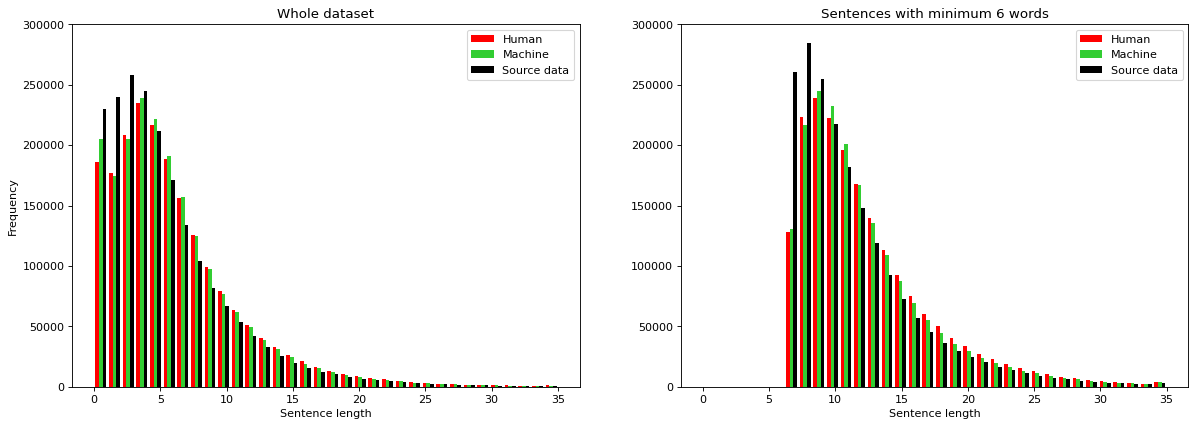

In [144]:
fig, axs = plt.subplots(1,2, figsize=(18, 6), dpi=80,)
axs[0].set_ylim([0, 300000])
axs[1].set_ylim([0, 300000])
bins = np.linspace(0, 35, 35)

axs[1].hist([ita_hist_human_short, ita_hist_machine_short, ita_hist_source_short],bins, label=['Human', 'Machine', 'Source data'], color=['red', 'limegreen', 'black'])
axs[0].hist([ita_hist_human_long, ita_hist_machine_long, ita_hist_source_long],bins, label=['Human', 'Machine', 'Source data'], color=['red', 'limegreen', 'black']) 
axs[0].set_title('Whole dataset')
axs[1].set_title('Sentences with minimum 6 words')
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')

axs[0].set_xlabel('Sentence length', fontsize='medium')
axs[1].set_xlabel('Sentence length', fontsize='medium')
axs[0].set_ylabel('Frequency', fontsize='medium')

# Load Dutch dataset (long sentences)

In [153]:
filename_human = './dutch/long/english_original_data.txt'
filename_trans= './dutch/long/english_translated_data.txt'
filename_source = './dutch/sourceNL_long.txt'

print('Dutch stats -- long sentences')
print('')
print("Loading human corpus...")
human = loaddata(filename_human)
print("Done extracting lines! :)")
print('')

print("Loading machine corpus...")
machine = loaddata(filename_trans)
print("Done extracting lines! :)")
print('')


print("Loading source corpus...")
sourc = loaddata(filename_source)
print("Done extracting lines! :)")
print('')

total_sentences_human = len(human)
total_sentences_machine = len(machine)
total_sentences_source = len(sourc)

print("Sentences made by human: " +str(total_sentences_human))
print("Sentences made by google: " +str(total_sentences_machine))
print("Sentences source: " +str(total_sentences_source))


Dutch stats -- long sentences

Loading human corpus...
Scannig...
Done extracting lines! :)

Loading machine corpus...
Scannig...
Done extracting lines! :)

Loading source corpus...
Scannig...
Done extracting lines! :)

Sentences made by human: 2285431
Sentences made by google: 2285431
Sentences source: 2285432


# Compute frequencies

In [120]:
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import numpy as np

tokenizer = RegexpTokenizer(r'\w+')
total_tokens = 0
dutch_hist_human_long = [-1] * total_sentences_human

for i in range(total_sentences_human):
    length_sentence = 0
    sentence = human[i]
    
   # print(str(sentence)[:-2])
    tokens = tokenizer.tokenize(sentence[:-2])
    if(len(tokens) > 6):
        total_tokens = total_tokens + len(tokens)
        dutch_hist_human_long[i] = len(tokens)
    

print('Total human tokens: ' + str(total_tokens))

total_tokens = 0
dtuch_hist_machine_long = [-1] * total_sentences_human

for i in range(total_sentences_machine):
    length_sentence = 0
    sentence = machine[i]
    
   # print(str(sentence)[:-2])
    tokens = tokenizer.tokenize(sentence[:-2])
    if(len(tokens) > 6):
        total_tokens = total_tokens + len(tokens)
        dtuch_hist_machine_long[i] = len(tokens)

    

print('Total machine tokens: ' + str(total_tokens))


total_tokens = 0
dtuch_hist_machine_source = [-1] * total_sentences_source

for i in range(total_sentences_source):
    length_sentence = 0
    sentence = sourc[i]
    
   # print(str(sentence)[:-2])
    tokens = tokenizer.tokenize(sentence)
    if(len(tokens) > 6):
        total_tokens = total_tokens + len(tokens)
        dtuch_hist_machine_source[i] = len(tokens)

    

print('Total source: ' + str(total_tokens))



Total human tokens: 28924685
Total machine tokens: 24170771
Total source: 25413031


# Load Dutch dataset (all sentences)

In [152]:
filename_human = './dutch/all sentences/dataset.txt'
filename_source = './dutch/sourceNL.txt'

print('Dutch stats -- all sentences')
print('')
print("Loading all corpus...")
human = loaddata(filename_human)
print("Done extracting lines! :)")
print('')

print("Loading source corpus...")
sourc = loaddata(filename_source)
print("Done extracting lines! :)")
print('')


total_sentences_source = len(sourc)
total_sentences_human = len(human)

print("Sentences in dataset: " +str(int((total_sentences_human)/2)))
print("Sentences source: " +str(total_sentences_source))






Dutch stats -- all sentences

Loading all corpus...
Scannig...
Done extracting lines! :)

Loading source corpus...
Scannig...
Done extracting lines! :)

Sentences in dataset: 1869645
Sentences source: 1869645


# Compute frequencies

In [124]:
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import numpy as np

tokenizer = RegexpTokenizer(r'\w+')
total_tokens_human = 0
total_tokens_machine = 0
dutch_hist_human_all = [None] * int(total_sentences_human/2)
dutch_hist_machine_all = [None] * int(total_sentences_human/2)

h_counter = 0
m_counter = 0
s_tokens = 0

for i in range(total_sentences_human):
    length_sentence_human = 0
    length_sentence_machine = 0
    sentence = human[i]
    
   # print(str(sentence)[:-2])
    tokens = tokenizer.tokenize(sentence[:-2])
    typeSentence = int(sentence[-2:-1])
    
    if typeSentence == 0:
        total_tokens_human = total_tokens_human + len(tokens)
        dutch_hist_human_all[h_counter] = len(tokens)
        h_counter = h_counter + 1
    else:
        total_tokens_machine = total_tokens_machine + len(tokens)
        dutch_hist_machine_all[m_counter] = len(tokens)
        m_counter = m_counter + 1        
        
dtuch_hist_machine_source_all = [-1] * total_sentences_source

for i in range(total_sentences_source):
    length_sentence = 0
    sentence = sourc[i]
    
   # print(str(sentence)[:-2])
    tokens = tokenizer.tokenize(sentence)
    s_tokens = s_tokens + len(tokens)
    dtuch_hist_machine_source_all[i] = len(tokens)

    


print("Sentences in dataset: " +str(total_sentences_human))

print('Total human tokens: ' + str(total_tokens_human))
print('Total machine tokens: ' + str(total_tokens_machine))
print('Total source tokens: ' + str(s_tokens))





Sentences in dataset: 3739290
Total human tokens: 13144139
Total machine tokens: 10992191
Total source tokens: 10972421


# Plot datasets

Text(0, 0.5, 'Frequency')

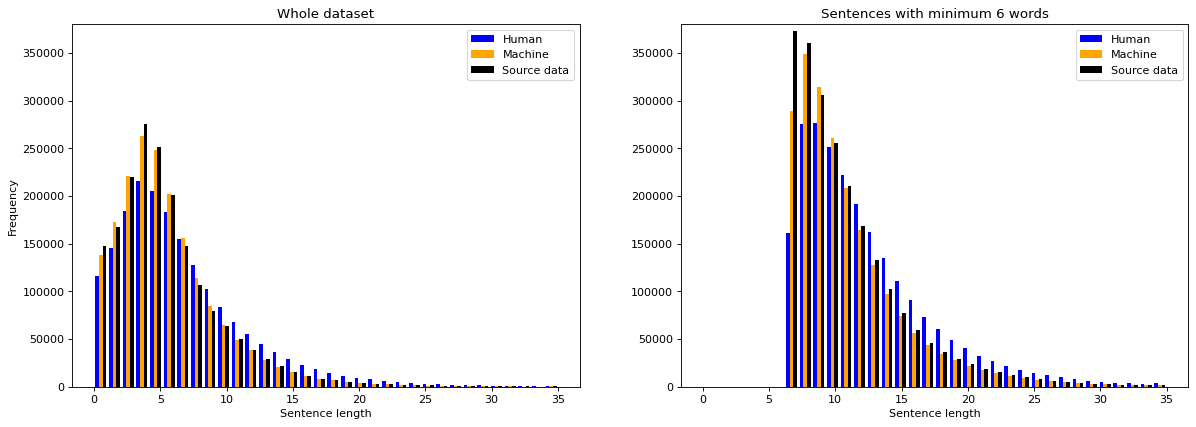

In [146]:
fig, axs = plt.subplots(1,2, figsize=(18, 6), dpi=80,)
axs[0].set_ylim([0, 380000])
axs[1].set_ylim([0, 380000])

axs[0].hist([dutch_hist_human_all, dutch_hist_machine_all, dtuch_hist_machine_source_all],bins, label=['Human', 'Machine', 'Source data'], color=['blue','orange', 'black']) 
axs[1].hist([dutch_hist_human_long, dtuch_hist_machine_long, dtuch_hist_machine_source],bins, label=['Human', 'Machine', 'Source data'], color=['blue','orange', 'black'])
axs[0].set_title('Whole dataset')
axs[1].set_title('Sentences with minimum 6 words')
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')


axs[0].set_xlabel('Sentence length', fontsize='medium')
axs[1].set_xlabel('Sentence length', fontsize='medium')
axs[0].set_ylabel('Frequency', fontsize='medium')